# Predicting Chronic Kidney Disease based on health records
- classification problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("kidney_disease.csv")
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

- for numerical data use Mean and median
- for categorical data use Mode

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
mode= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputer=pd.DataFrame(mode.fit_transform(df))
df_imputer.columns=df.columns
df_imputer

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
df_imputer.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [11]:
df_imputer.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [12]:
set(df_imputer['age'].tolist())

{2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 11.0,
 12.0,
 14.0,
 15.0,
 17.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 90.0}

In [13]:
for i in df_imputer.columns:
    print("********************",i,"******************")
    print()
    print(set(df_imputer[i].tolist()))
    print()

******************** id ******************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 

In [14]:
print(df_imputer['rc'].mode())
print(df_imputer['wc'].mode())
print(df_imputer['pcv'].mode())

0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [15]:
df_imputer['classification']=df_imputer['classification'].apply(lambda x : 'ckd' if x =='ckd\t' else x)
df_imputer['cad']=df_imputer['cad'].apply(lambda x : 'no' if x =='\tno' else x)
df_imputer['dm']=df_imputer['dm'].apply(lambda x : 'no' if x =='\tno' else x)
df_imputer['dm']=df_imputer['dm'].apply(lambda x : 'yes' if x =='\tyes' else x)
df_imputer['rc']=df_imputer['rc'].apply(lambda x : '5.2' if x =='\t?' else x)
df_imputer['wc']=df_imputer['wc'].apply(lambda x : '9800' if x =='\t6200' else x)
df_imputer['wc']=df_imputer['wc'].apply(lambda x : '9800' if x =='\t8400' else x)
df_imputer['wc']=df_imputer['wc'].apply(lambda x : '9800' if x =='\t?' else x)
df_imputer['pcv']=df_imputer['pcv'].apply(lambda x : '41' if x =='\t43' else x)
df_imputer['pcv']=df_imputer['pcv'].apply(lambda x : '41' if x =='\t?' else x)

In [16]:
for i in df_imputer.columns:
    print("********************",i,"******************")
    print()
    print(set(df_imputer[i].tolist()))
    print()

******************** id ******************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 

In [17]:
df_imputer['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


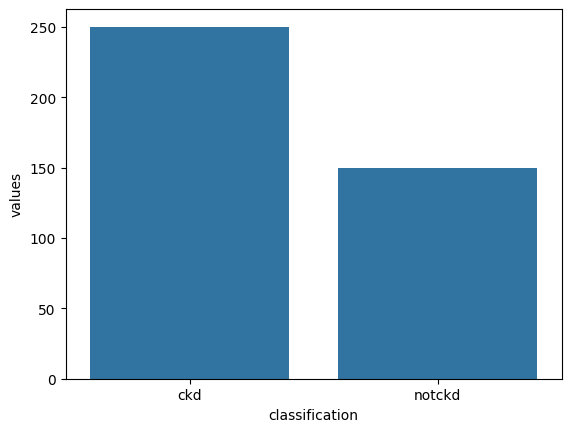

In [18]:
temp=df_imputer['classification'].value_counts()
temp_df=pd.DataFrame({'classification':temp.index,'values':temp.values})
print(sns.barplot(x='classification',y='values',data=temp_df))
##imbalanced data

In [19]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [20]:
df_imputer.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [21]:
df.select_dtypes(exclude=['object']).columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')

In [22]:
for i in df.select_dtypes(exclude=['object']).columns:
    df_imputer[i]=df_imputer[i].apply(lambda x:float(x))

In [23]:
df_imputer.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

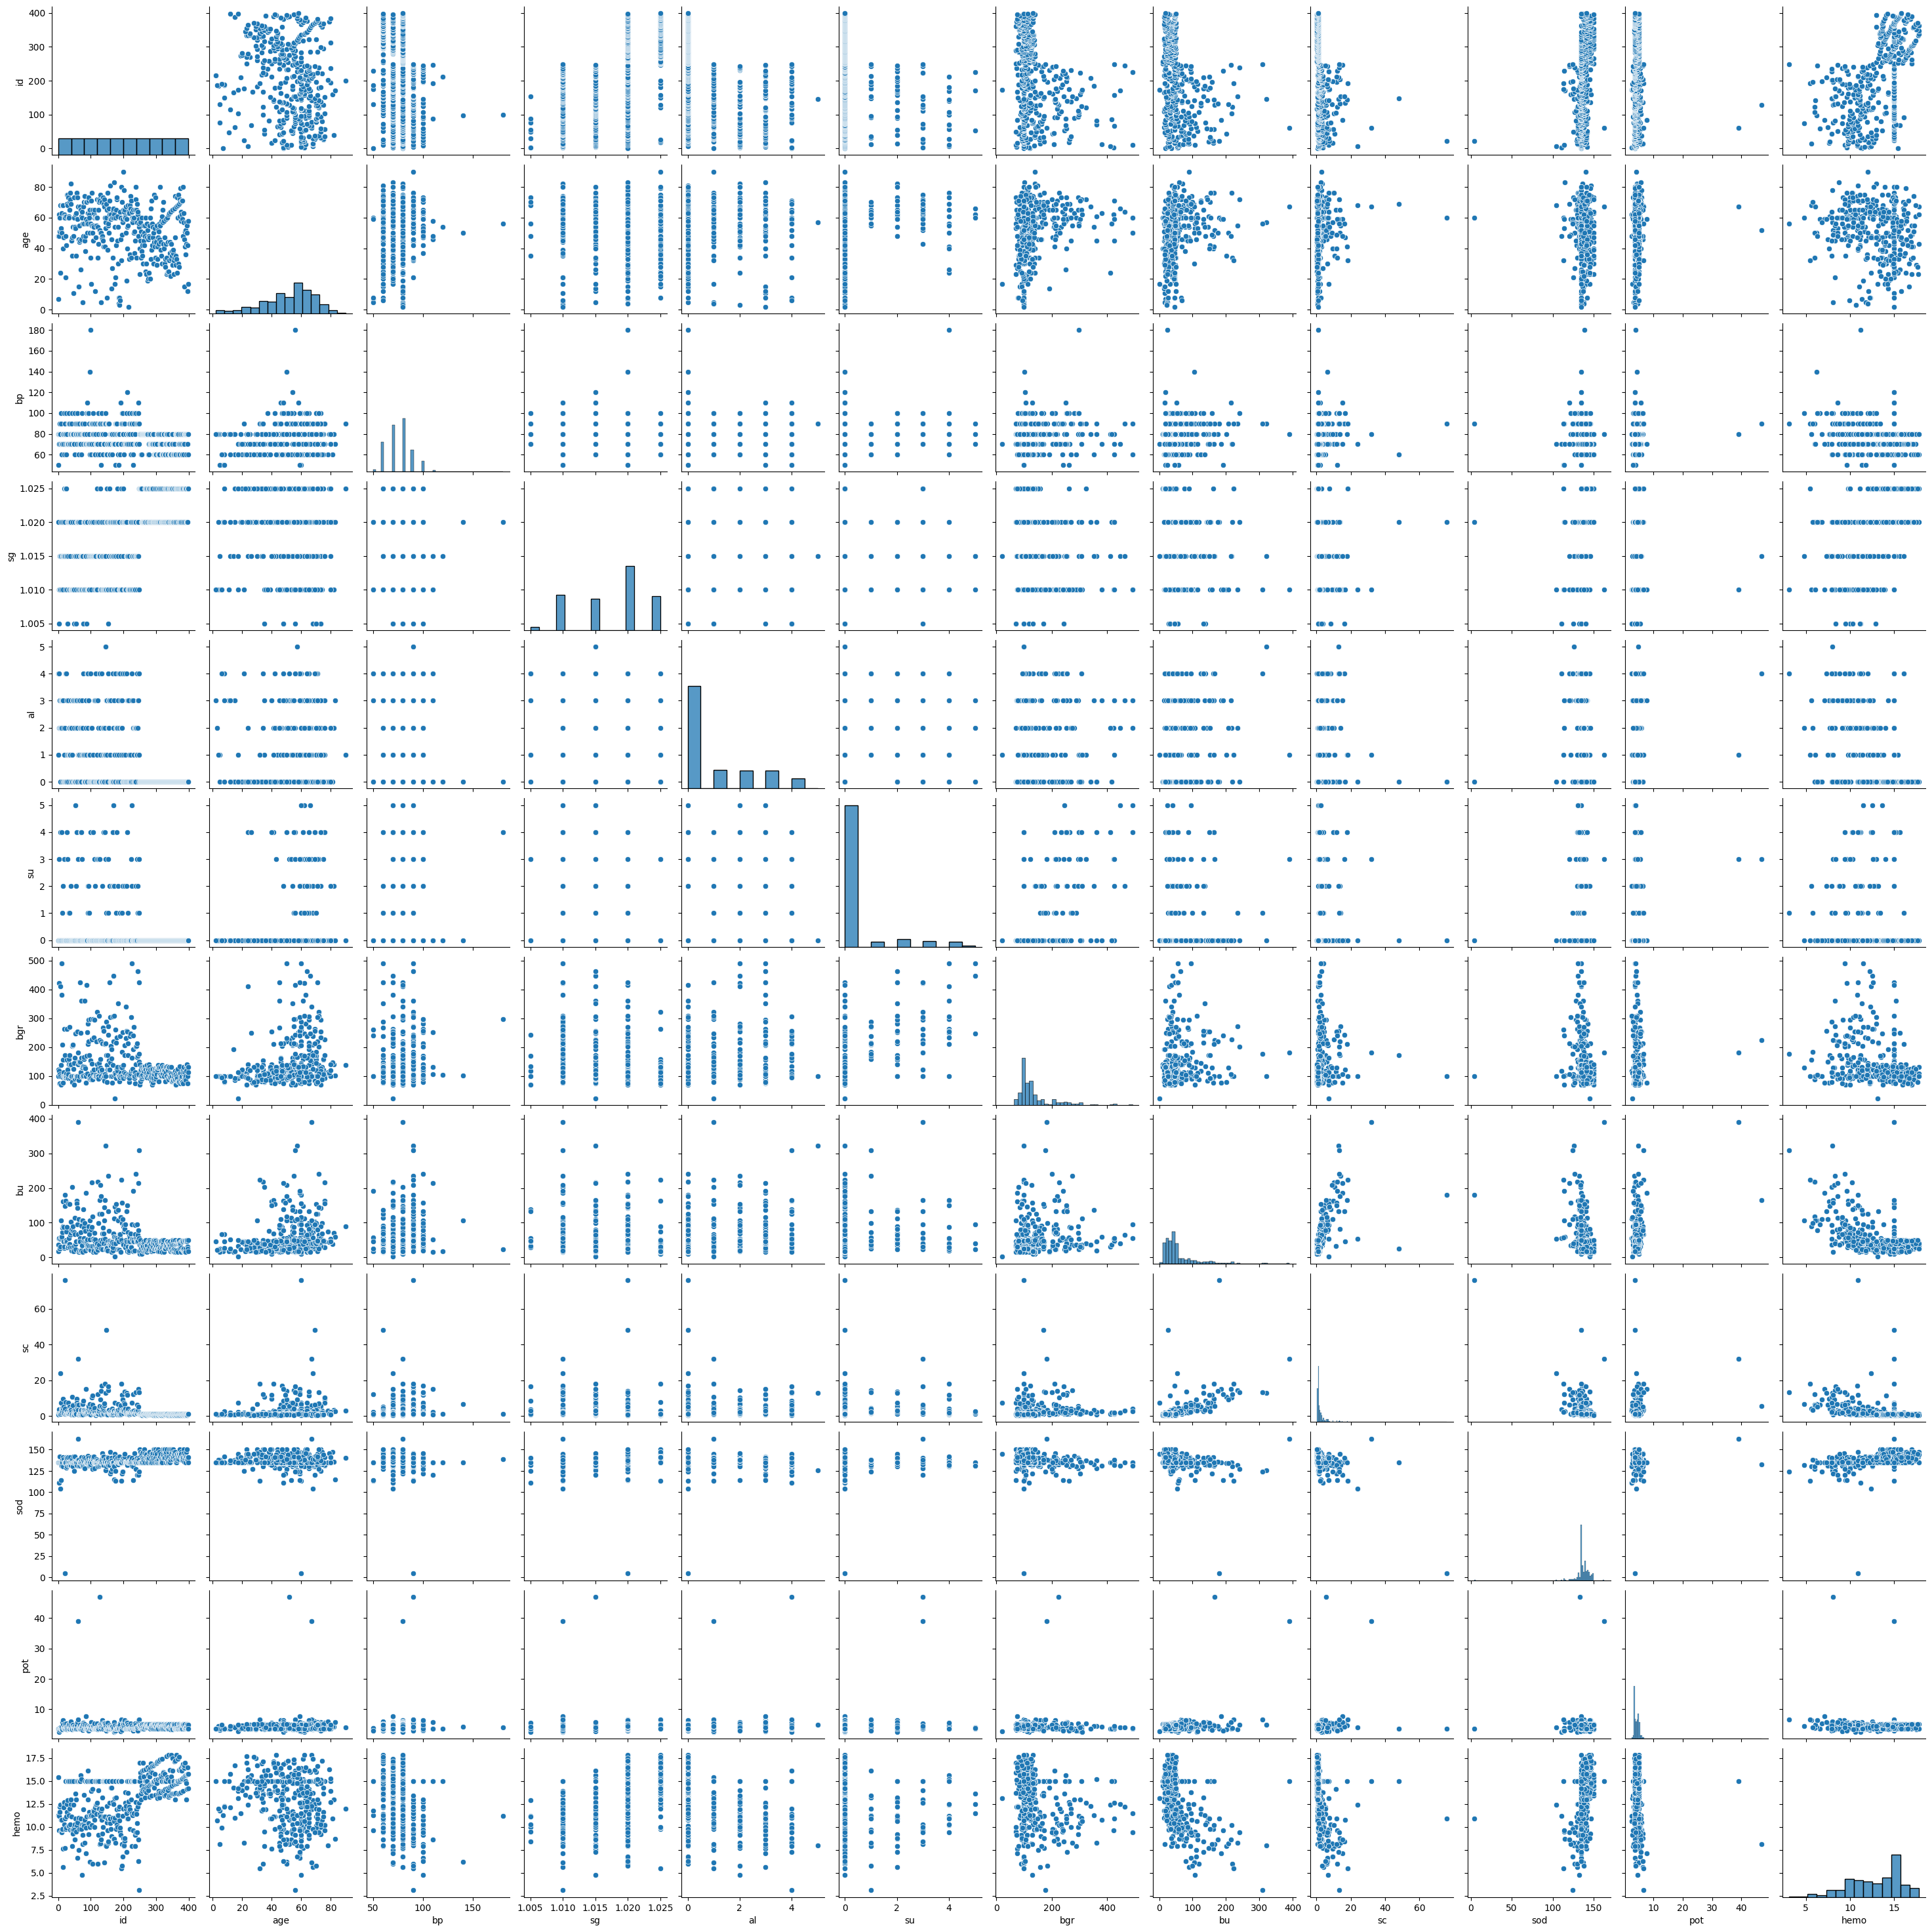

In [24]:
sns.pairplot(df_imputer)

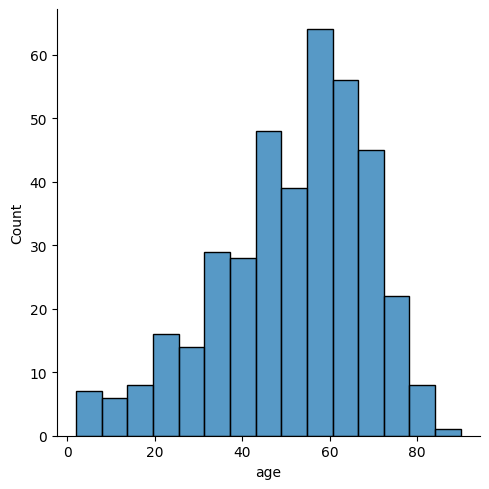

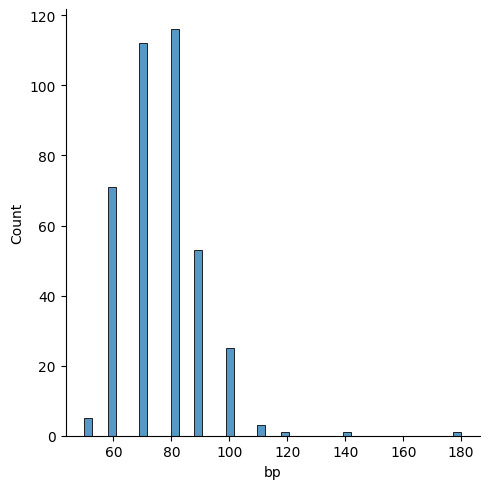

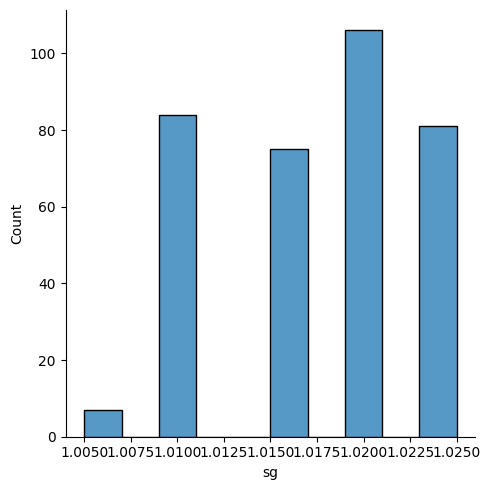

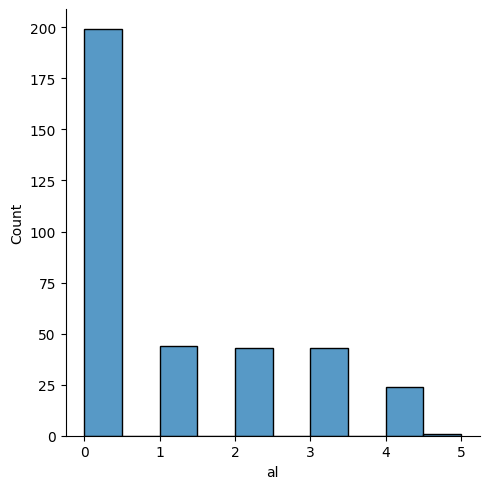

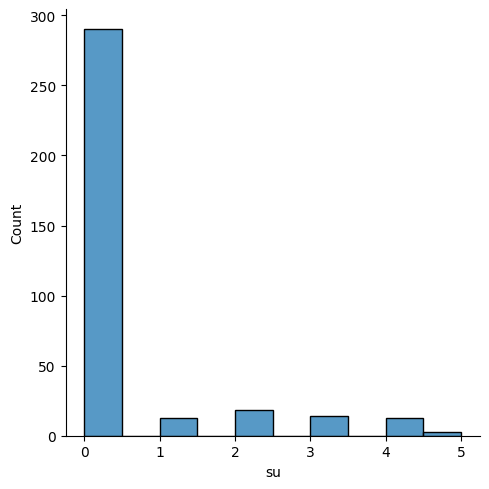

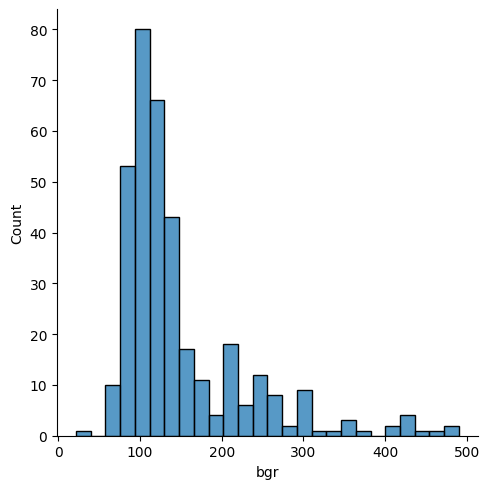

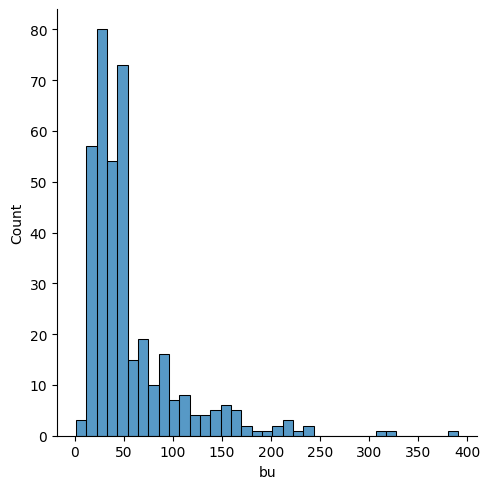

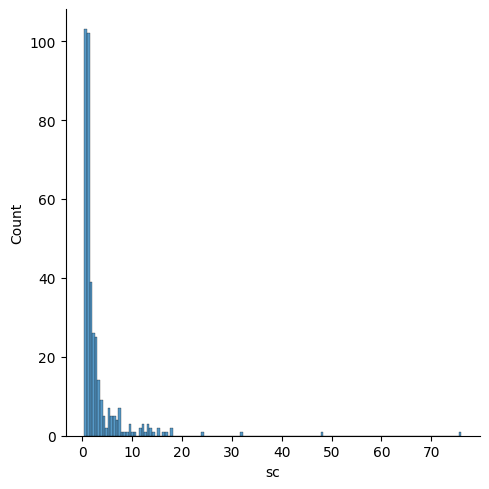

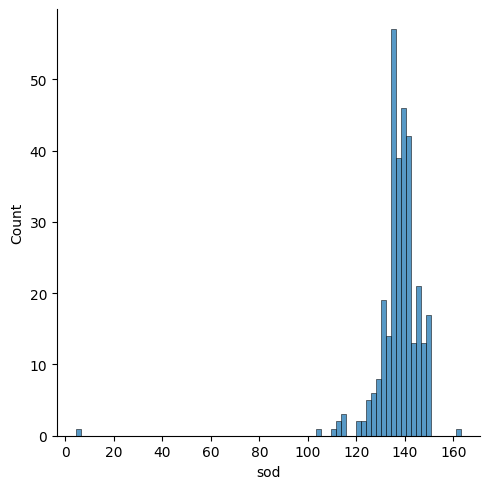

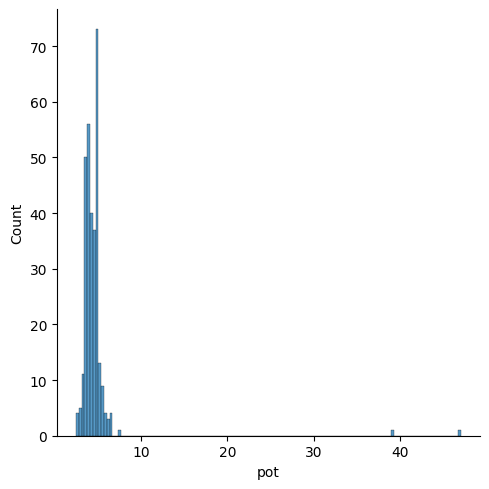

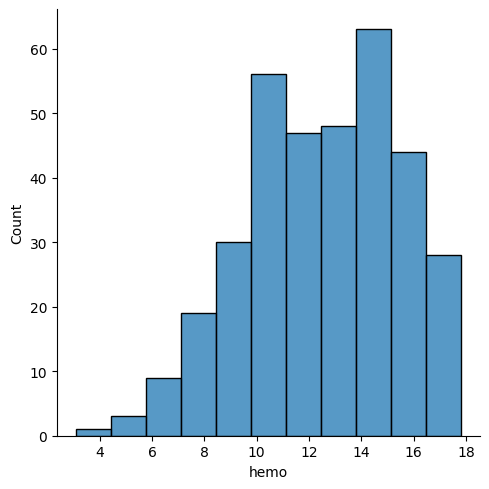

In [25]:
def distplots(col):
    sns.displot(df[col])
    plt.show()

for i in list(df_imputer.select_dtypes(exclude=['object']).columns)[1:]:
    distplots(i)

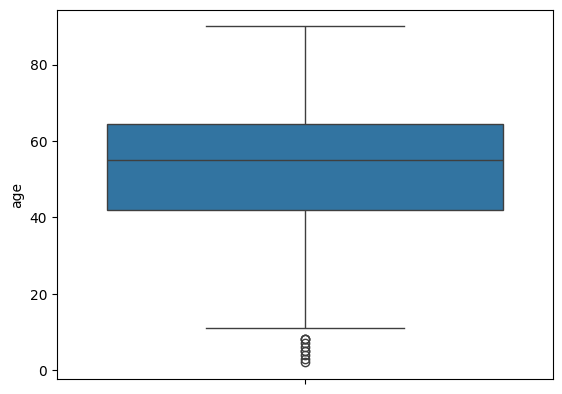

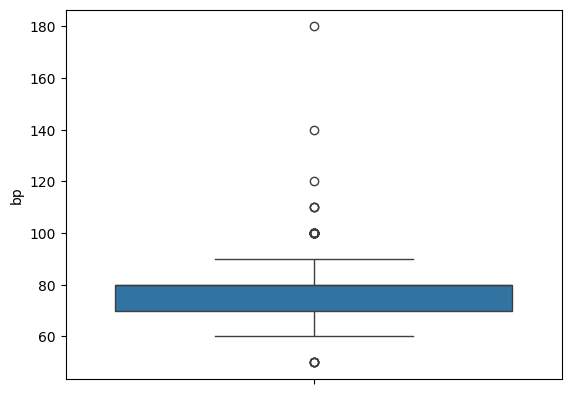

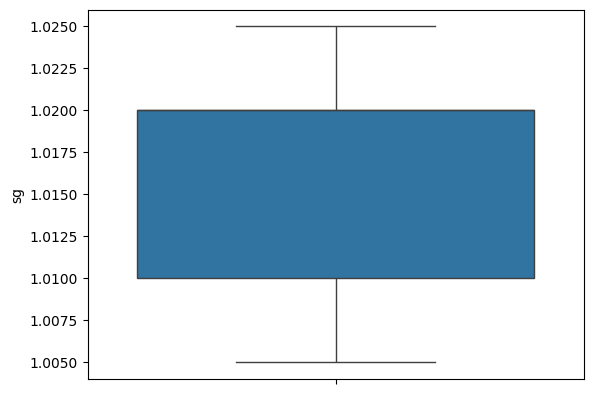

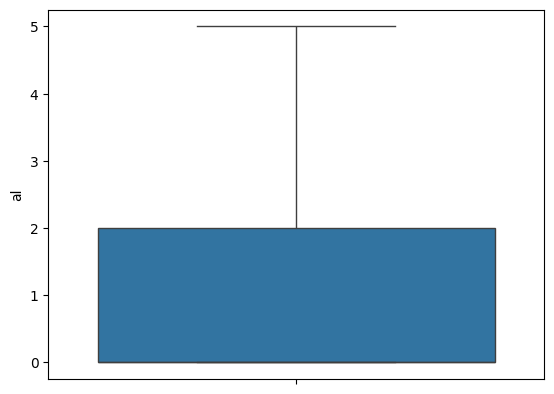

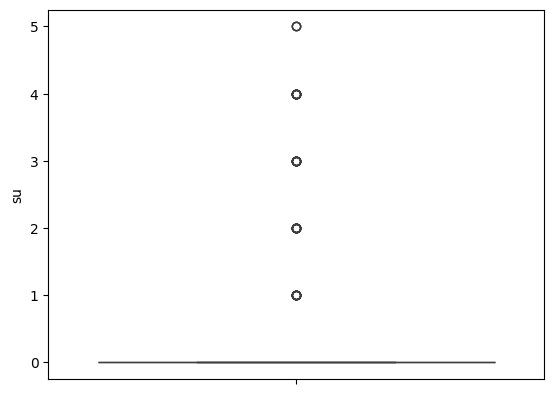

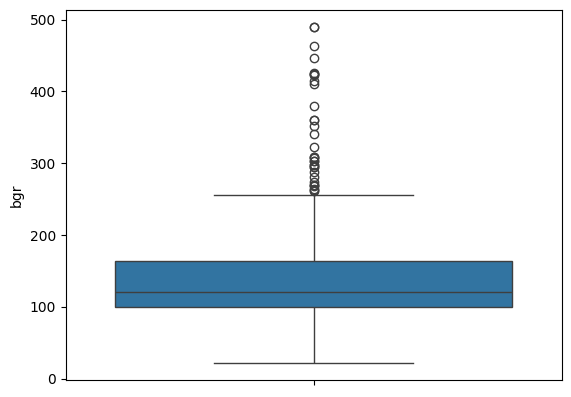

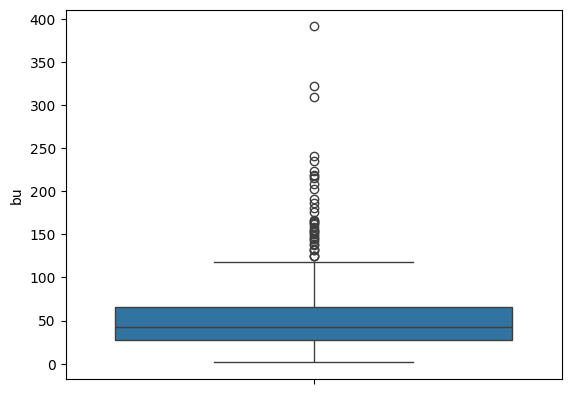

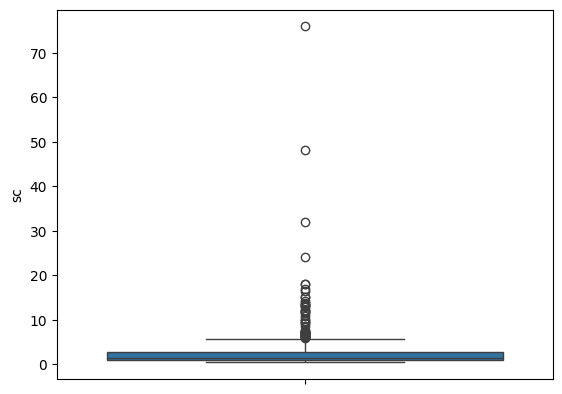

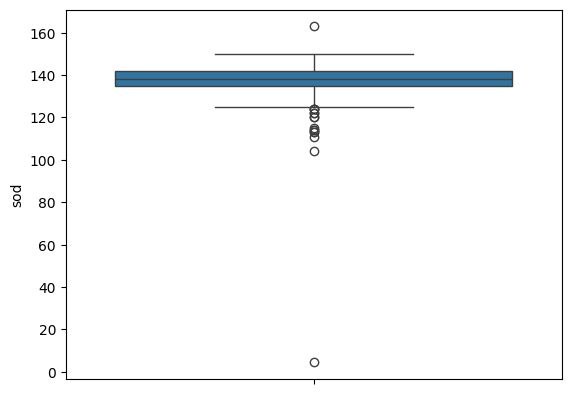

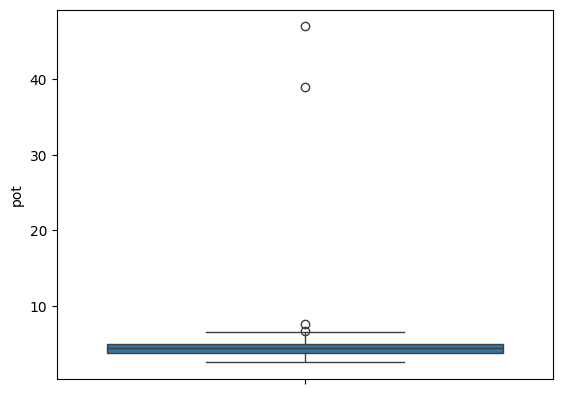

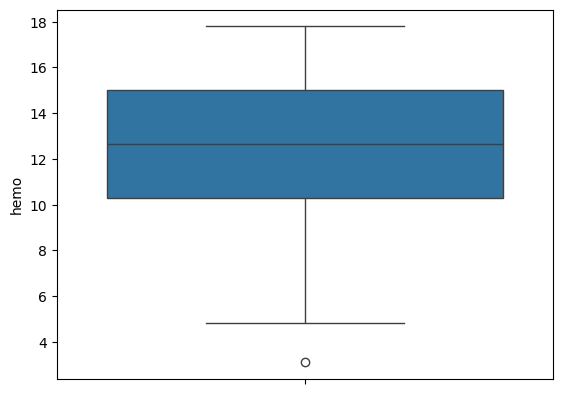

In [26]:
### outliers detection
def boxf(col):
     sns.boxplot(df[col])
     plt.show() 

for i in list(df_imputer.select_dtypes(exclude=['object']).columns)[1:]:
     boxf(i)

In [27]:
df_imputer.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [28]:
## label encoder
from sklearn import preprocessing

In [29]:
encode=df_imputer.apply(preprocessing.LabelEncoder().fit_transform)
encode

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,2,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,1,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,2,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,1,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,29,0,1,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,43,0,1,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,35,0,1,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,40,0,1,0,0,0,0,1


In [30]:
encode.to_csv('Final_preprocessingdata.csv')

<Axes: >

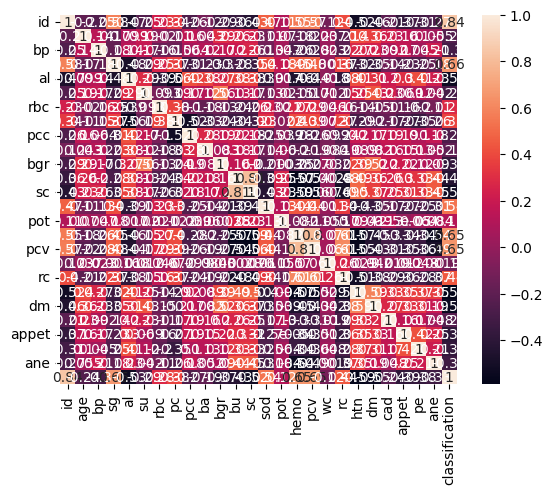

In [31]:
corr=encode.corr()
sns.heatmap(corr,annot=True)

In [32]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [33]:
x=encode.drop(['id','classification'],axis=1)

In [34]:
y=encode['classification']

In [35]:
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,40,3,3,1,0,1,1,0,0,48,...,90,30,69,33,1,2,0,0,0,0
1,5,0,3,4,0,1,1,0,0,26,...,49,24,53,33,0,1,0,0,0,0
2,54,3,1,2,3,1,1,0,0,140,...,32,17,67,33,0,2,0,1,0,1
3,40,2,0,4,0,1,0,1,0,44,...,48,18,59,18,1,1,0,1,1,1
4,43,3,1,2,0,1,1,0,0,33,...,52,21,65,26,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,47,3,3,0,0,1,1,0,0,64,...,93,33,59,29,0,1,0,0,0,0
396,34,2,4,0,0,1,1,0,0,3,...,101,40,69,43,0,1,0,0,0,0
397,8,3,3,0,0,1,1,0,0,27,...,94,35,58,35,0,1,0,0,0,0
398,11,1,4,0,0,1,1,0,0,41,...,78,37,64,40,0,1,0,0,0,0


In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [37]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [38]:
print(Counter(y))

Counter({0: 250, 1: 150})


In [39]:
ros=RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
## scaling the data 
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x_ros)
y=y_ros

In [42]:
y

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: classification, Length: 500, dtype: int64

In [43]:
x

array([[ 0.06666667, -0.33333333,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.86666667, -1.        ,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.44      , -0.33333333, -0.5       , ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [-0.44      , -0.55555556,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.41333333, -0.55555556,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.38666667, -0.77777778,  1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [44]:
df.shape ##24 columns

(400, 26)

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca=PCA(.95)
X_PCA=pca.fit_transform(x)

In [47]:
print(x.shape)
print(X_PCA.shape)

(500, 24)
(500, 18)


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test= train_test_split(X_PCA,y,test_size=0.2,random_state=7)

In [50]:
x_train

array([[-1.25598431,  0.06707922,  0.13547127, ...,  0.15158107,
        -0.0876465 ,  0.00794493],
       [-1.23236589,  0.02454874, -0.02394767, ...,  0.32450088,
        -0.01703137, -0.23259741],
       [-0.46226409, -0.34991394, -0.14765308, ..., -0.8520453 ,
         0.33493762,  0.06876453],
       ...,
       [ 1.05852163, -1.58717514, -0.6628086 , ..., -0.44297257,
         0.12601121, -0.39760011],
       [ 4.38402517,  0.58270058,  1.22700417, ..., -0.09585031,
        -0.0182758 , -0.23818104],
       [ 0.69315966, -0.90856627, -0.98150535, ...,  0.21281348,
         0.0129667 ,  1.09710499]])

In [51]:
y_train.shape

(400,)

In [52]:
y_test.shape

(100,)

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
!pip install --upgrade keras tensorflow


In [ ]:
import tensorflow as tf

In [ ]:
!pip install tensorflow==2.15.0.post1
!pip install keras==2.15.0


In [83]:
## Neural network
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.models import Sequential, Model

In [84]:
x_train.shape[1]

18

In [97]:
def model():
    clf=Sequential()
    clf.add(Dense(15,input_shape=(x_train.shape[1], ),activation='relu'))
    clf.add(Dropout(0.2))
    clf.add(Dense(15,activation='relu'))
    clf.add(Dropout(0.4))
    clf.add(Dense(1,activation='sigmoid'))
    clf.compile(optimizer = 'adam' , loss='binary_crossentropy',metrics=['accuracy'])
    return clf

In [98]:
model=model()

In [99]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 15)                285       
                                                                 
 dropout_8 (Dropout)         (None, 15)                0         
                                                                 
 dense_15 (Dense)            (None, 15)                240       
                                                                 
 dropout_9 (Dropout)         (None, 15)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 16        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=35,verbose=1)

Epoch 1/35
13/13 [==============================] - 0s 14ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2/35
13/13 [==============================] - 0s 7ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3/35
13/13 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/35
13/13 [==============================] - 0s 12ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 5/35
13/13 [==============================] - 0s 11ms/step - loss: 0.0125 - accuracy: 0.9975 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/35
13/13 [==============================] - 0s 8ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/35
13/13 [==============================] - 0s 12ms/step - loss: 0.0190 - accuracy: 0.9925 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 8/35
13/13

In [120]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve,average_precision_score,precision_recall_curve

## function to plot the roc_curve 
def plot_auc(t_y,p_y):
    fpr,tpr,thresold=roc_curve(t_y,p_y,pos_label=1)
    fig,c_ax= plt.subplots(1,1,figsize=(9,9))
    c_ax.plot(fpr,tpr,label='%s (AUC:%0.2f)' % ('classification',auc(fpr,tpr)))
    c_ax.plot([0,1],[0,1],color='navy',lw=1,linestyle='--')
    c_ax.legend()
    c_ax.set_xlabel('False Positive rate')
    c_ax.set_ylabel('True Positive rate')

#function to plot the preccision_recall curve
def plot_precision_recall_curve_helper(t_y,p_y):
    fig,c_ax=plt.subplots(1,1,figsize=(9,9))
    precision,recall,thresolds=precision_recall_curve(t_y,p_y,pos_label=1)
    aps=average_precision_score(t_y,p_y)
    c_ax.plot(recall,precision,label='%s (AP Score:%0.2f)'  %  ('classification',aps))
    c_ax.plot(recall,precision,color='red',lw=2)
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')

#function to plot history
def plot_history(history):
    f=plt.figure()
    f.set_figwidth(15)

    f.add_subplot(1,2,1)
    plt.plot(history.history['val_loss'],label='val loss')
    plt.plot(history.history['loss'],label='train loss')
    plt.legend()
    plt.title('Model Loss')

    f.add_subplot(1,2,2)
    plt.plot(history.history['val_accuracy'],label='val accuracy')
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.legend()
    plt.title('Model Accuracy')


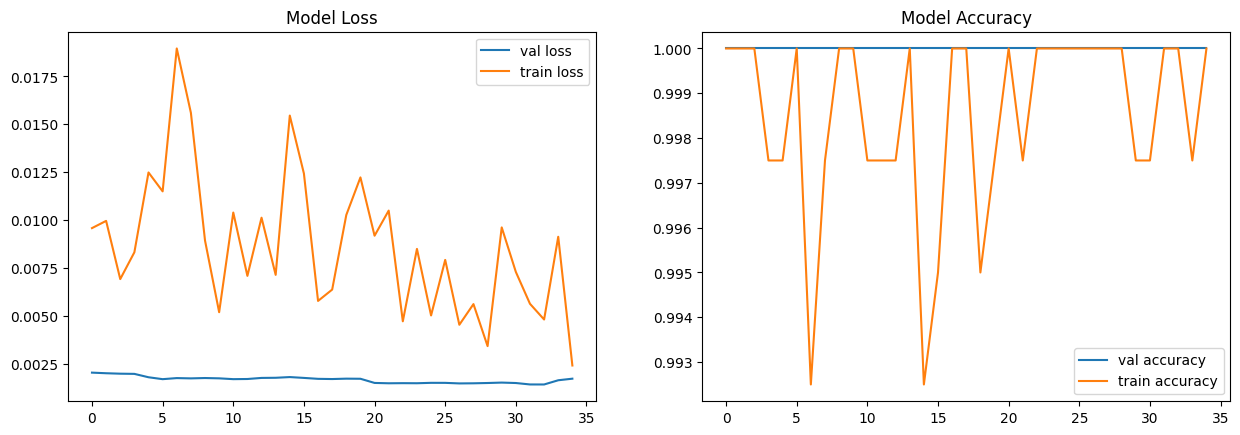

In [121]:
hist=plot_history(history)

4/4 [==============================] - 0s 3ms/step


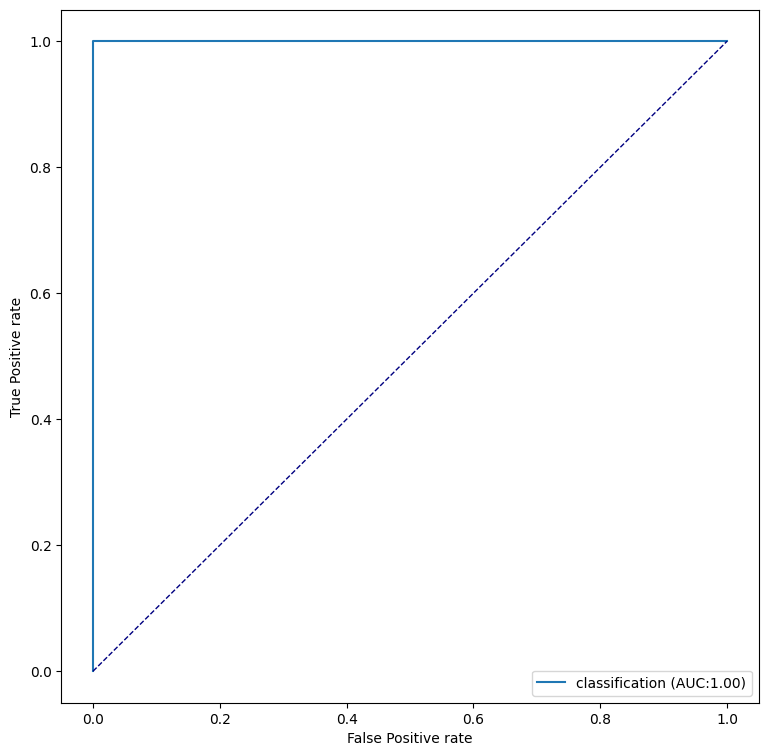

In [122]:
plot_auc(y_test,model.predict(x_test,verbose=True))

4/4 [==============================] - 0s 4ms/step


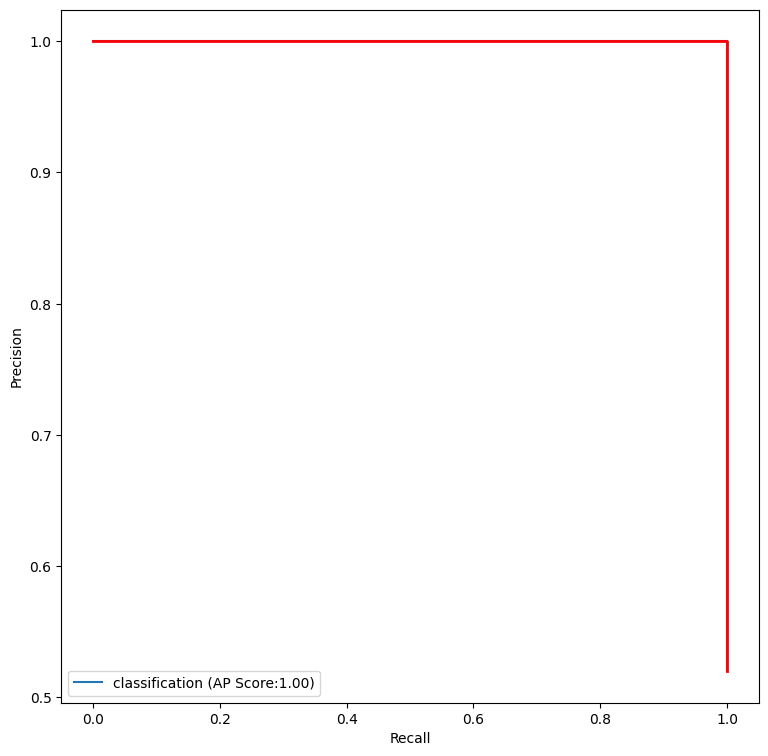

In [123]:
plot_precision_recall_curve_helper(y_test,model.predict(x_test,verbose=True))

In [126]:
def calc_f1(prec,recall):
    return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision,recall,thresholds=precision_recall_curve(y_test,model.predict(x_test,verbose=True))
f1score=[calc_f1(precision[i],recall[i]) for i in range (len(thresholds))]
idx=np.argmax(f1score)
thresold=thresholds[idx]
print('****************************************************************************************************************************************************************************************')
print('precision: '+ str(precision[idx]))
print('Recall: '+ str(recall[idx]))
print('Thresold: '+ str(thresholds[idx]))
print('F1 score: '+ str(f1score[idx]))

4/4 [==============================] - 0s 6ms/step
****************************************************************************************************************************************************************************************
precision: 1.0
Recall: 1.0
Thresold: 0.9859081
F1 score: 1.0


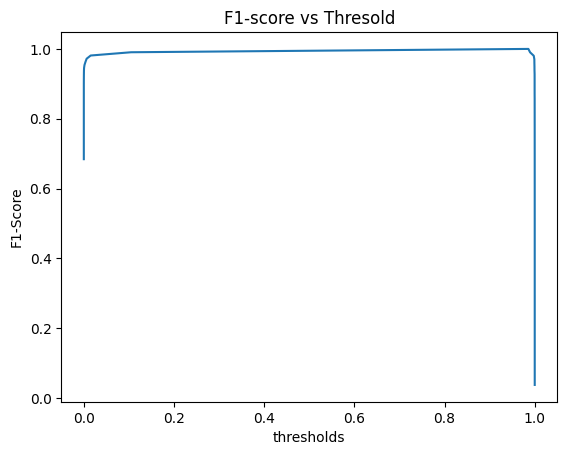

In [127]:
plt.figure()
plt.plot(thresholds,f1score)
plt.title('F1-score vs Thresold')
plt.xlabel('thresholds')
plt.ylabel('F1-Score')
plt.show()